<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_%EA%B0%95%EC%9D%98_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris = load_iris()
iris

In [ ]:
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

In [ ]:
print("평균: \n", iris_df.mean())
print("분산: \n", iris_df.var())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled= scaler.transform(iris_df)

In [ ]:
iris_scaled

In [ ]:
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names)


In [ ]:
print("평균: \n", iris_df_scaled.mean())
print("분산: \n", iris_df_scaled.var())

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
print("평균: \n", iris_df.mean())
print("분산: \n", iris_df.var())

In [ ]:
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)
iris_df_scaled=pd.DataFrame(data=iris_scaled, columns=iris.feature_names )
iris_df_scaled

In [ ]:
import pandas as pd
data={'class': ['A','B','C','D']}
df=pd.DataFrame(data)
df

In [ ]:
df['class']=df['class'].map({'A':1, 'B':2, 'C':3, 'D':4})
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
items =['A', 'B', 'C','D']
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

In [ ]:
labels

array([0, 1, 2, 3])

In [ ]:
origins=encoder.inverse_transform([0,1,2,3])
origins

array(['A', 'B', 'C', 'D'], dtype='<U1')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
items =['A', 'B', 'C','D']
encoder= LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items).reshape(-1,1)
labels

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder=OneHotEncoder(sparse=False) #배열확인


In [ ]:
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
oh_labels


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
item_df=pd.DataFrame({'items':items})
item_df

,items
0,A
1,B
2,C
3,D


In [ ]:
pd.get_dummies(item_df, drop_first=True)

,items_B,items_C,items_D
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [ ]:
scale=StandardScaler()
scale.fit(iris_df)
iris_scaled=scale.transform(iris_df)
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names )
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
iris_df_scaled['target']=iris.target

In [ ]:
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(iris_df_scaled.iloc[:,:-1])
df_pca=pca.transform(iris_df_scaled.iloc[:,:-1])


In [ ]:
df_pca=pd.DataFrame(df_pca, columns=['component_1','component_2'])
df_pca.head()
print(pca.explained_variance_ratio_)  #주성분 분산의 성능, 기여율 분산을 알아봄,
print(pca.explained_variance_ratio_.cumsum())   #누적 기여율이 85%를 넘어야 쓸만한 것임

[0.72962445 0.22850762]
[0.72962445 0.95813207]


In [ ]:
import matplotlib.pyplot as plt
df_pca['target']=iris_df_scaled['target']

In [ ]:
df_pca_0=df_pca[df_pca['target']==0]
df_pca_1=df_pca[df_pca['target']==1]
df_pca_2=df_pca[df_pca['target']==2]

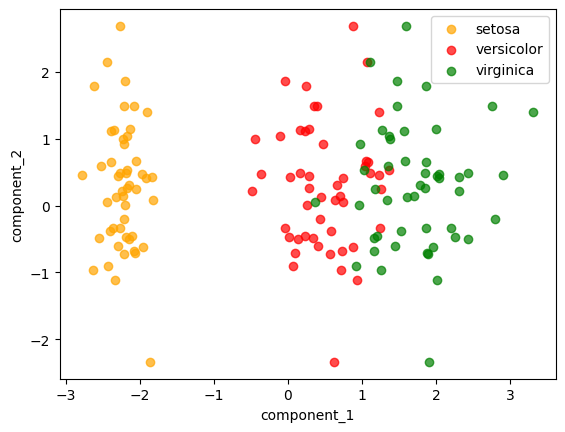

In [ ]:
plt.scatter(df_pca_0['component_1'],df_pca_0['component_2'],color='orange', alpha=0.7, label='setosa')
plt.scatter(df_pca_1['component_1'],df_pca_0['component_2'],color='red', alpha=0.7, label='versicolor')
plt.scatter(df_pca_2['component_1'],df_pca_0['component_2'],color='green', alpha=0.7, label='virginica')
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.legend()
plt.show()

 데이터 분석 알고리즘

---



In [ ]:
 from sklearn.datasets import load_iris
 iris=load_iris()
 iris.data.shape

(150, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=123)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [ ]:
X_train[:5]

In [ ]:
y_train[:5]

In [ ]:
import numpy as np
X=np.arrange(10)

from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
np.random.seed(1111)

In [ ]:
y_true=np.random.random_sample(5)
print(y_true)

[0.0955492  0.9250037  0.34357342 0.31047694 0.00200984]


### 회귀분석

In [ ]:
import matplotlib as plt
import pandas as pd
dataset=pd.read_csv('/content/P2_C2_01_linearregression.csv')

In [ ]:
dataset.head()


,hour,score
0,0.4,5
1,0.6,10
2,1.9,12
3,1.7,14
4,2.8,30


In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

(array([[0.4],
        [0.6],
        [1.9],
        [1.7],
        [2.8]]),
 24)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

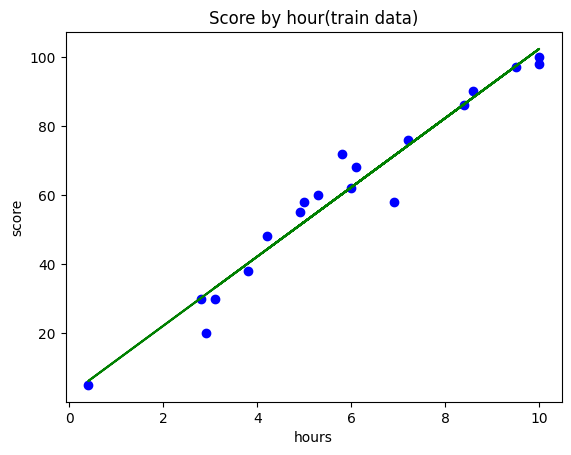

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('Score by hour(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

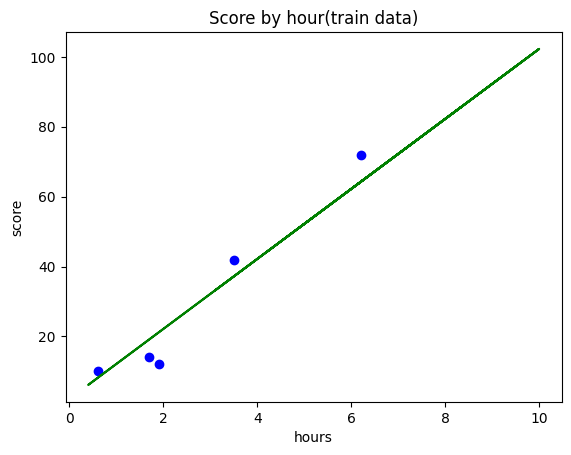

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('Score by hour(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [ ]:
print("예상시간 공부했을때 점수는:", model.predict([[6]]))

예상시간 공부했을때 점수는: [62.21350273]


In [ ]:
model.coef_  #회귀계수

array([10.01824252])

In [ ]:
model.intercept_  #상수항

2.1040476345946857

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([37.16789644, 64.21715123, 21.13870841, 19.13505991,  8.11499314])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
mape= mean_absolute_percentage_error(y_test, y_pred)

print(mse,mae, mape)

39.47200848482503 5.754745502628227 0.30799898406531423


In [ ]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9316620351717018
0.9561844485934162


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
target = diabetes.target
X=data
y=target
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [ ]:
model.intercept_

152.13348416289597

In [ ]:
model.score(X,y)

0.5177484222203499

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
iris=load_iris()

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234,stratify=iris.target)

In [ ]:
print(X_train.shape)

(120, 4)


In [ ]:
model_1=LogisticRegression(C=0.05, max_iter=100)
model_glm_1=model_1.fit(X_train, y_train)

In [ ]:
model_2=LogisticRegression()
model_glm_2=model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score
y_pred_1=model_glm_1.predict(X_test)
y_pred_2=model_glm_2.predict(X_test)

In [ ]:
macro_f1=f1_score(y_test, y_pred_1, average="macro")
macro_f2=f1_score(y_test, y_pred_2, average="macro")
print(macro_f1,macro_f2)

0.8653198653198654 0.9333333333333332


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
model_1=DecisionTreeClassifier()
model_dt_1=model_1.fit(X_train, y_train)


model_2=DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=1234)
model_dt_2=model_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred_1=model_dt_1.predict(X_test)
y_pred_2=model_dt_2.predict(X_test)

macro_f1_1=f1_score(y_test, y_pred_1, average="macro")
macro_f1_2=f1_score(y_test, y_pred_2, average="macro")
print(macro_f1_1,macro_f1_2)

0.9333333333333332 0.9665831244778613


결정트리

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
X_train, X_test, y_train, y_test=train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1234)

In [ ]:
model_1=DecisionTreeRegressor()
model_dtr_1=model_1.fit(X_train, y_train)

model_2=DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1234 )
model_dtr_2=model_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred_1=model_dtr_1.predict(X_test)
y_pred_2=model_dtr_2.predict(X_test)

mae_1=mean_absolute_error(y_test, y_pred_1)
mae_2=mean_absolute_error(y_test, y_pred_2)
print(mae_1, mae_2)

58.41573033707865 52.47961517371391


서포터 백터 머신

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer    #2진분류 데이터셋임

breast=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(breast.data, breast.target, test_size=0.2, random_state=1234, stratify=breast.target)

In [ ]:
svm_1=SVC(kernel='linear', C=0.5, probability=True)
model_svm_1=svm_1.fit(X_train, y_train)

svm_2=SVC(kernel='rbf', C=0.5, probability=True)    #rbf가 defualt 값이라서 굳이 안써도 됨   ,roc-auc값을 확인하려면 확률값의 인자가 필요한데 probability가 그 역활을 함
model_svm_2=svm_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_1=model_svm_1.predict_proba(X_test)[:,1]     #proba를 사용하면 0이될 확률 1이될 확률을 가져오기 떄문에 칼럼 전체를 가져오기 위해서 사용
y_pred_2=model_svm_2.predict_proba(X_test)[:,1]

In [ ]:
fpr_1, tpr_1, thresholds_1=roc_curve(y_test, y_pred_1)
fpr_2, tpr_2, thresholds_2=roc_curve(y_test, y_pred_2)

AUC_1=auc(fpr_1, tpr_1)
AUC_2=auc(fpr_2, tpr_2)
print(AUC_1, AUC_2)

0.9831349206349207 0.9718915343915344


In [ ]:
iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)
from sklearn.svm import LinearSVC                    #support vector machine의 다지 분류이다

svm_multi=LinearSVC(C=0.05)
model_svm_multi=svm_multi.fit(X_train, y_train)

y_pred=model_svm_multi.predict(X_test)
macro_f1=f1_score(y_pred, y_test, average="macro")
print(macro_f1)

0.8976982097186701


In [ ]:
from sklearn.svm import SVR, LinearSVR

diabetes=load_diabetes()
X_train, X_test, y_train, y_test=train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1234)

svm_1=SVR(C=0.05)
model_svm_1=svm_1.fit(X_train, y_train)

svm_2=LinearSVR(C=0.05)
model_svm_2=svm_2.fit(X_train, y_train)

y_pred_1=model_svm_1.predict(X_test)
y_pred_2=model_svm_2.predict(X_test)

mae_1=mean_absolute_error(y_test, y_pred_1)
mae_2=mean_absolute_error(y_test, y_pred_2)

print(mae_1, mae_2)


62.86386215254686 133.67625325594224


나인베이즈

In [ ]:
from sklearn.naive_bayes import BernoulliNB     #2진분류 사용
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

breast_cancer=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=1234, stratify=breast_cancer.target)

In [ ]:
nb_B=BernoulliNB()
model_nb_B=nb_B.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred=model_nb_B.predict_proba(X_test)[:,1]

fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=auc(fpr, tpr)

print(AUC)

0.5208333333333334


In [ ]:
from sklearn.naive_bayes import MultinomialNB   #다지분류
from sklearn.datasets import load_iris
iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
nb_M=MultinomialNB()
model_nb_M=nb_M.fit(X_train, y_train)
y_pred=model_nb_M.predict(X_test)

from sklearn.metrics import f1_score
macro_1=f1_score(y_test, y_pred, average='macro')
print(macro_1)


0.9326599326599326


In [ ]:
from sklearn.naive_bayes import GaussianNB      #회귀분석
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
X_train, X_test, y_train, y_test=train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1234)

nb_G=GaussianNB()
model_nb_G=nb_G.fit(X_train, y_train)
y_pred=model_nb_G.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_pred, y_test)
print(mae)

53.91011235955056


## `K-최근접 이웃`

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
knn_C_1=KNeighborsClassifier(n_neighbors=5, weights='uniform')    #거리관계없이 가중치 균일
model_knn_C_1=knn_C_1.fit(X_train, y_train)

knn_C_2=KNeighborsClassifier(n_neighbors=3, weights='distance')     #거리가 멀수록 더 가중치를 부여
model_knn_C_2=knn_C_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred_1=model_knn_C_1.predict(X_test)
y_pred_2=model_knn_C_2.predict(X_test)

score_1=f1_score(y_test, y_pred_1, average='macro')
score_2=f1_score(y_test, y_pred_2, average='macro')

print(score_1, score_2)

0.9326599326599326 0.899749373433584


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()
X_train, X_test, y_train, y_test=train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=1234)

In [ ]:
knn_R_1=KNeighborsRegressor(n_neighbors=5, weights='uniform')    #거리관계없이 가중치 균일
model_knn_R_1=knn_R_1.fit(X_train, y_train)

knn_R_2=KNeighborsRegressor(n_neighbors=3, weights='distance')     #거리가 멀수록 더 가중치를 부여
model_knn_R_2=knn_R_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_1=model_knn_R_1.predict(X_test)
y_pred_2=model_knn_R_2.predict(X_test)

mae_1=mean_absolute_error(y_test, y_pred_1)
mae_2=mean_absolute_error(y_test, y_pred_2)

print(mae_1, mae_2)

44.2179775280899 42.68113426649344


인공지능 신경망

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
ann_C_1=MLPClassifier()
model_ann_C_1=ann_C_1.fit(X_train, y_train)

ann_C_2=MLPClassifier(activation='relu')
model_ann_C_2=ann_C_2.fit(X_train, y_train)

ann_C_3=MLPClassifier(activation='tanh', max_iter=500)
model_ann_C_3=ann_C_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred_1=model_ann_C_1.predict(X_test)
y_pred_2=model_ann_C_2.predict(X_test)
y_pred_3=model_ann_C_3.predict(X_test)

In [ ]:
macro_f1_1=f1_score(y_test, y_pred_1, average='macro')
macro_f1_2=f1_score(y_test, y_pred_2, average='macro')
macro_f1_3=f1_score(y_test, y_pred_3, average='macro')

In [ ]:
print(macro_f1_1, macro_f1_2, macro_f1_3)

0.8976982097186701 0.8976982097186701 0.9665831244778613


In [ ]:
y_pred_3=model_ann_C_3.predict(X_test[[0]])
print(y_pred_3)

[2]


앙상블

```

```


분류     /    회귀
**굵은 텍스트**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
bag_C_1=BaggingClassifier(n_estimators=30, random_state=1234)
model_bag_C_1=bag_C_1.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred_1=model_bag_C_1.predict(X_test)

macro_1=f1_score(y_pred_1, y_test, average='macro')
print(macro_1)

0.9333333333333332


램덤폴레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.2, random_state=1234, stratify=iris.target)

In [ ]:
rf_C_1=RandomForestClassifier()
model_rf_C_1=rf_C_1.fit(X_train, y_train)

rf_C_2=RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10, random_state=1234)
model_rf_C_2=rf_C_2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_pred_1=model_rf_C_1.predict(X_test)
y_pred_2=model_rf_C_2.predict(X_test)


macro_1=f1_score(y_pred_1, y_test, average='macro')
macro_2=f1_score(y_pred_2, y_test, average='macro')

print(macro_1, macro_2)

0.9333333333333332 0.9333333333333332


Adaboost

Light GBM 분류

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgb_C_1=LGBMClassifier(n_estimators=500, max_depth=8, n_jobs=5, min_child_weight=10, objective='muliticlass', random_state=1234)
model_lgb_C_1=lgb_C_1.fit(X_train, y_train)

lgb_C_2=LGBMClassifier(n_estimators=500, max_depth=5, n_jobs=5, min_child_weight=10, learning_rate=1.0, objective='muliticlass', random_state=2222)
model_lgb_C_2=lgb_C_2.fit(X_train, y_train)

비지도 학습 - 군집분석(계층적 군집분석)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
labels_origins=iris.target

In [ ]:
cluster_sing=AgglomerativeClustering(n_clusters=3, linkage='single')
label_pred_sing=cluster_sing.fit_predict(data)

In [ ]:
cluster_com=AgglomerativeClustering(n_clusters=3, linkage='complete')
label_pred_com=cluster_com.fit_predict(data)     #군집분석에서는 fit과 predict를 같이 사용한다.

cluster_avg=AgglomerativeClustering(n_clusters=3, linkage='average')
label_pred_avg=cluster_avg.fit_predict(data)

cluster_ward=AgglomerativeClustering(n_clusters=3, linkage='ward')
label_pred_ward=cluster_ward.fit_predict(data)

In [ ]:
print("최장연결법:", rand_score(labels_origins,label_pred_sing))
print("최장연결법:", rand_score(labels_origins,label_pred_com))
print("평균연결법:", rand_score(labels_origins,label_pred_avg))
print("와드연겳법:", rand_score(labels_origins,label_pred_ward))

최장연결법: 0.7766442953020134
최장연결법: 0.8367785234899329
평균연결법: 0.8922595078299776
와드연겳법: 0.8797315436241611


In [ ]:
print("최장연결법:", adjusted_rand_score(labels_origins,label_pred_sing))
print("최장연결법:", adjusted_rand_score(labels_origins,label_pred_com))
print("평균연결법:", adjusted_rand_score(labels_origins,label_pred_avg))
print("와드연겳법:", adjusted_rand_score(labels_origins,label_pred_ward))

최장연결법: 0.5637510205230709
최장연결법: 0.6422512518362898
평균연결법: 0.7591987071071522
와드연겳법: 0.7311985567707746


k-means 군집분석

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
cluster_k2=KMeans(n_clusters=2, max_iter=300, random_state=1234, algorithm='auto')
label_pred_k2=cluster_k2.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
cluster_k3=KMeans(n_clusters=3, max_iter=300, random_state=1234, algorithm='auto')
label_pred_k3=cluster_k3.fit_predict(data)

cluster_k4=KMeans(n_clusters=4, max_iter=300, random_state=1234, algorithm='auto')
label_pred_k4=cluster_k4.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [ ]:
sil_k2=silhouette_score(data, label_pred_k2)
sil_k3=silhouette_score(data, label_pred_k3)
sil_k4=silhouette_score(data, label_pred_k4)

print(sil_k2, sil_k3, sil_k4)

0.6810461692117462 0.5528190123564095 0.4974551890173751


 기출문제 복원 part 3